In [1]:
import datajoint as dj
from churchland_pipeline_python import action, acquisition, equipment, lab, processing, reference # OR from churchland_pipeline_python import *
from churchland_pipeline_python.utilities import datajointutils, dataviz
from pacman_pipeline_python import pacman_acquisition, pacman_behavior, pacman_brain, pacman_muscle, pacman_processing
from pacman_pipeline_python.utilities import autopopulate

%load_ext autoreload
%autoreload 2

Connecting njm2149@datajoint.u19motor.zi.columbia.edu:3306


In [60]:
import numpy as np
import matplotlib.pyplot as plt
import colorcet as cc

## ERDs

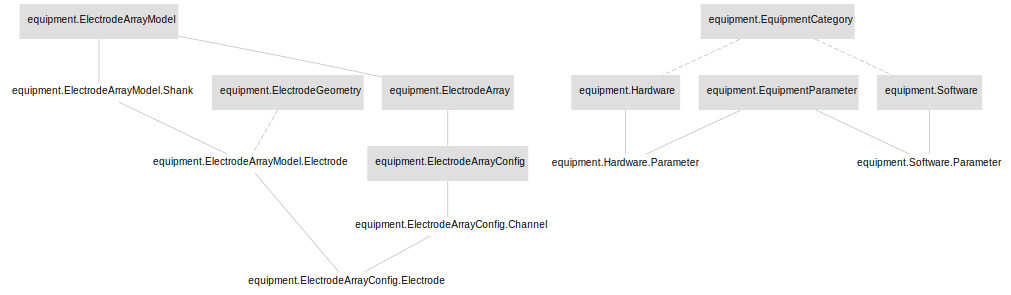

In [3]:
dj.ERD(equipment)

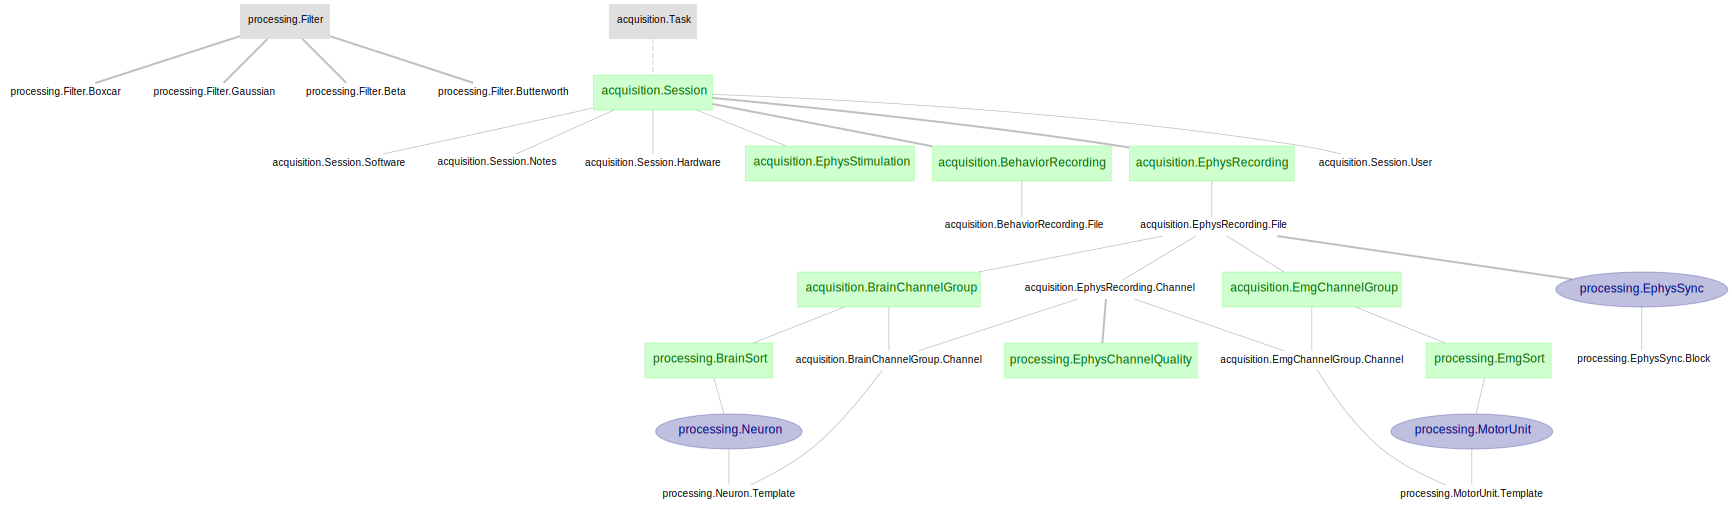

In [4]:
dj.ERD(acquisition) + dj.ERD(processing)

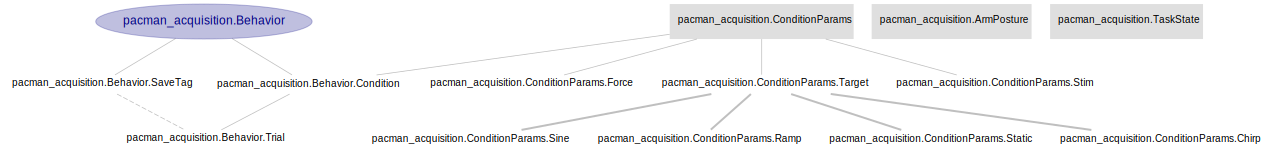

In [5]:
dj.ERD(pacman_acquisition)

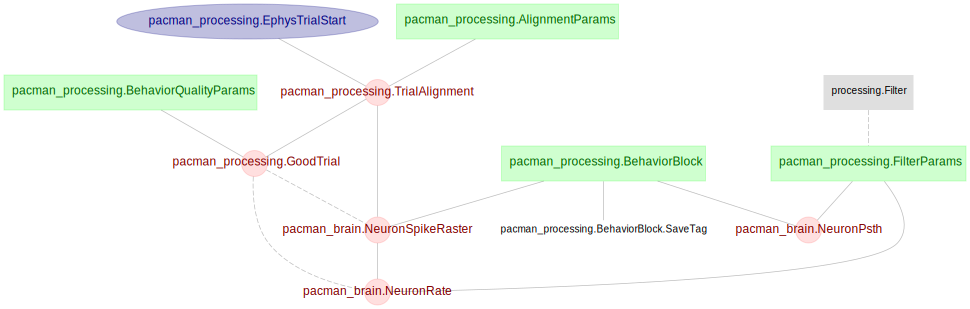

In [6]:
dj.ERD(pacman_processing) + dj.ERD(pacman_brain) + dj.ERD(processing.Filter)

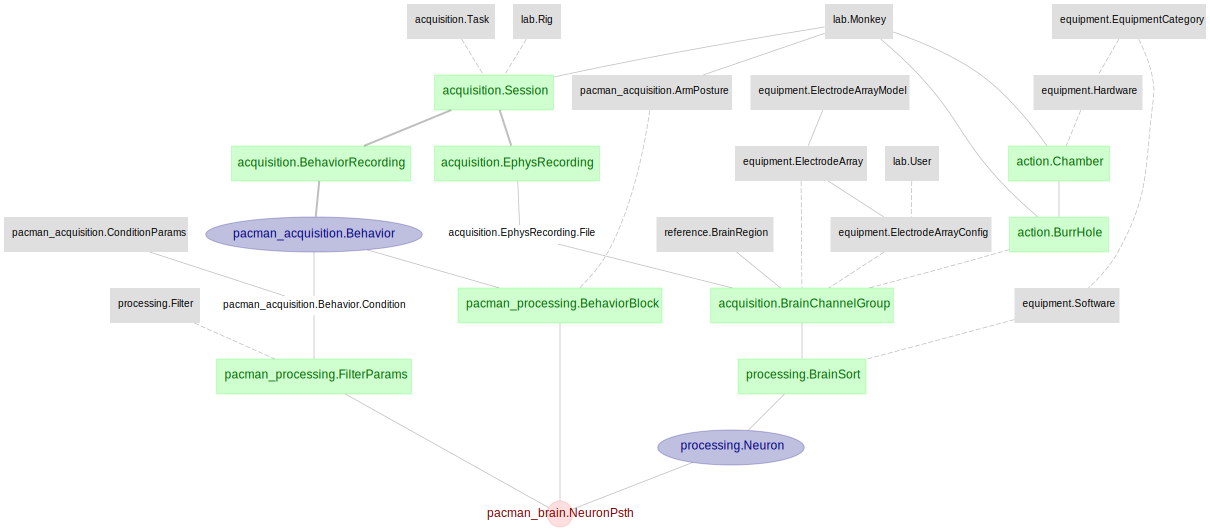

In [7]:
dj.ERD(pacman_brain.NeuronPsth) - 10

## Querying tables

In [8]:
# default is 12
dj.config['display.limit'] = 4

In [9]:
# list all recording sessions
acquisition.Session()

*session_date  *monkey      rig         task       task_version   session_proble session_proble
+------------+ +----------+ +---------+ +--------+ +------------+ +------------+ +------------+
2018-04-13     Cousteau     Jumanji     pacman     1.0            0                            
2018-04-20     Cousteau     Jumanji     pacman     1.0            0                            
2018-06-15     Cousteau     Jumanji     pacman     1.0            0                            
2018-06-22     Cousteau     Jumanji     pacman     1.0            0                            
   ...
 (Total: 73)

In [10]:
# sessions with behavior and ephys recordings
acquisition.Session & acquisition.BehaviorRecording & acquisition.EphysRecording

*session_date  *monkey      rig         task       task_version   session_proble session_proble
+------------+ +----------+ +---------+ +--------+ +------------+ +------------+ +------------+
2018-04-13     Cousteau     Jumanji     pacman     1.0            0                            
2018-04-20     Cousteau     Jumanji     pacman     1.0            0                            
2018-06-15     Cousteau     Jumanji     pacman     1.0            0                            
2018-06-22     Cousteau     Jumanji     pacman     1.0            0                            
   ...
 (Total: 72)

In [11]:
# sessions with behavior recording and without ephys recordings
acquisition.Session & acquisition.BehaviorRecording - acquisition.EphysRecording

*session_date  *monkey      rig         task       task_version   session_proble session_proble
+------------+ +----------+ +---------+ +--------+ +------------+ +------------+ +------------+
2018-07-12     Cousteau     Jumanji     pacman     1.0            0                            
 (Total: 1)

In [12]:
# sessions with sorted neurons and motor units
acquisition.Session & processing.Neuron & processing.MotorUnit

*session_date  *monkey      rig         task       task_version   session_proble session_proble
+------------+ +----------+ +---------+ +--------+ +------------+ +------------+ +------------+
2019-12-16     Cousteau     Jumanji     pacman     1.0            0                            
2020-01-06     Cousteau     Jumanji     pacman     1.0            0                            
2020-01-08     Cousteau     Jumanji     pacman     1.0            0                            
 (Total: 3)

In [13]:
# neurons from sessions with motor units
processing.Neuron & processing.MotorUnit

*session_date  *monkey      *ephys_file_id *brain_region_ *brain_channel *brain_sort_id *neuron_id    neuron_isolati neuron_spi
+------------+ +----------+ +------------+ +------------+ +------------+ +------------+ +-----------+ +------------+ +--------+
2019-12-16     Cousteau     0              M1             0              0              0             single         =BLOB=    
2019-12-16     Cousteau     0              M1             0              0              1             single         =BLOB=    
2019-12-16     Cousteau     0              M1             0              0              2             single         =BLOB=    
2019-12-16     Cousteau     0              M1             0              0              3             single         =BLOB=    
   ...
 (Total: 173)

In [14]:
# neurons recorded with Neuropixels
processing.Neuron & (acquisition.BrainChannelGroup & {'electrode_array_model': 'Neuropixels'})

*session_date  *monkey      *ephys_file_id *brain_region_ *brain_channel *brain_sort_id *neuron_id    neuron_isolati neuron_spi
+------------+ +----------+ +------------+ +------------+ +------------+ +------------+ +-----------+ +------------+ +--------+
2019-11-22     Cousteau     0              M1             0              0              0             single         =BLOB=    
2019-11-22     Cousteau     0              M1             0              0              1             single         =BLOB=    
2019-11-22     Cousteau     0              M1             0              0              2             single         =BLOB=    
2019-11-22     Cousteau     0              M1             0              0              3             single         =BLOB=    
   ...
 (Total: 881)

In [15]:
# pacman condition params (each ID represents a unique combination of Force, Target, and Stim params)
pacman_acquisition.ConditionParams()

*condition_id 
+------------+
0             
1             
2             
3             
   ...
 (Total: 373)

In [16]:
# force params
pacman_acquisition.ConditionParams.Force()

*condition_id  *force_id    force_max     force_offset   force_inverted
+------------+ +----------+ +-----------+ +------------+ +------------+
0              0            16            -0.1400        0             
1              0            16            -0.1400        0             
2              0            16            -0.1400        0             
3              0            16            -0.1400        0             
   ...
 (Total: 373)

In [17]:
# sinusoidal target params
pacman_acquisition.ConditionParams.Sine()

*condition_id  *target_id    target_amplitu target_frequen
+------------+ +-----------+ +------------+ +------------+
4              4             1.0000         0.5000        
8              8             1.0000         2.0000        
10             4             0.5000         2.0000        
16             14            1.0000         0.5000        
   ...
 (Total: 22)

In [18]:
# recorded behavior conditions
pacman_acquisition.Behavior.Condition()

*session_date  *monkey      *condition_id  condition_ condition_
+------------+ +----------+ +------------+ +--------+ +--------+
2018-04-13     Cousteau     0              =BLOB=     =BLOB=    
2018-04-20     Cousteau     0              =BLOB=     =BLOB=    
2018-04-13     Cousteau     1              =BLOB=     =BLOB=    
2018-04-20     Cousteau     1              =BLOB=     =BLOB=    
   ...
 (Total: 1028)

In [19]:
# forces
pacman_behavior.Force()

*session_date  *monkey      *behavior_bloc *ephys_file_id *condition_id  *trial    *alignment_par *filter_params behavior_quali good_trial     force_raw  force_filt
+------------+ +----------+ +------------+ +------------+ +------------+ +-------+ +------------+ +------------+ +------------+ +------------+ +--------+ +--------+
2018-04-13     Cousteau     0              0              0              76        0              0              0              1              =BLOB=     =BLOB=    
2018-04-13     Cousteau     0              0              0              104       0              0              0              1              =BLOB=     =BLOB=    
2018-04-13     Cousteau     0              0              0              126       0              0              0              1              =BLOB=     =BLOB=    
2018-04-13     Cousteau     0              0              0              142       0              0              0              1              =BLOB=     =BLOB=    
   ...
 (Total: 31938)

In [20]:
# PSTHs for all 2 Hz sinusoidal conditions (note: parentheses matter here!)
pacman_brain.NeuronPsth & (pacman_acquisition.ConditionParams.Sine & {'target_frequency': 2})

*session_date  *monkey      *ephys_file_id *brain_region_ *brain_channel *brain_sort_id *neuron_id    *behavior_bloc *condition_id  *filter_params neuron_pst
+------------+ +----------+ +------------+ +------------+ +------------+ +------------+ +-----------+ +------------+ +------------+ +------------+ +--------+
2019-08-13     Cousteau     0              M1             0              0              0             0              181            0              =BLOB=    
2019-08-13     Cousteau     0              M1             0              0              1             0              181            0              =BLOB=    
2019-08-13     Cousteau     0              M1             0              0              2             0              181            0              =BLOB=    
2019-08-13     Cousteau     0              M1             0              0              3             0              181            0              =BLOB=    
   ...
 (Total: 1257)

In [21]:
# PSTHs for static OR ramp conditions
pacman_brain.NeuronPsth & [pacman_acquisition.ConditionParams.Static, pacman_acquisition.ConditionParams.Ramp]

*session_date  *monkey      *ephys_file_id *brain_region_ *brain_channel *brain_sort_id *neuron_id    *behavior_bloc *condition_id  *filter_params neuron_pst
+------------+ +----------+ +------------+ +------------+ +------------+ +------------+ +-----------+ +------------+ +------------+ +------------+ +--------+
2019-08-13     Cousteau     0              M1             0              0              0             0              35             0              =BLOB=    
2019-08-13     Cousteau     0              M1             0              0              0             0              179            0              =BLOB=    
2019-08-13     Cousteau     0              M1             0              0              0             0              180            0              =BLOB=    
2019-08-13     Cousteau     0              M1             0              0              0             0              183            0              =BLOB=    
   ...
 (Total: 9376)

## Plotting

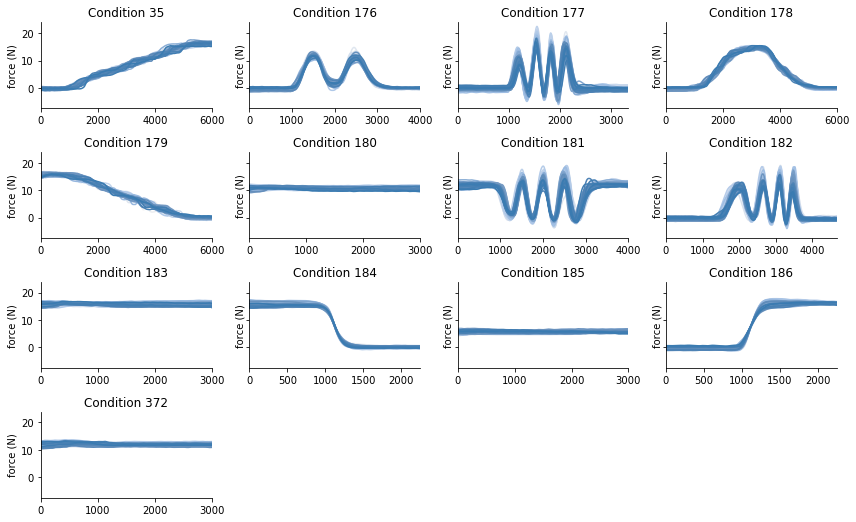

In [167]:
# plot good trial forces from 2019-12-16
# labels dict maps attributes to formatted text
dataviz.plot_table(
    pacman_behavior.Force
        & {'session_date': '2019-12-16', 'good_trial': 1},
    'force_filt', group_by=['condition_id'], stack_by=['trial'],
    axes=dict(sharey=True), 
    labels=dict(session_id=r'Session {}', condition_id=r'Condition {}', force_filt='force (N)')
)

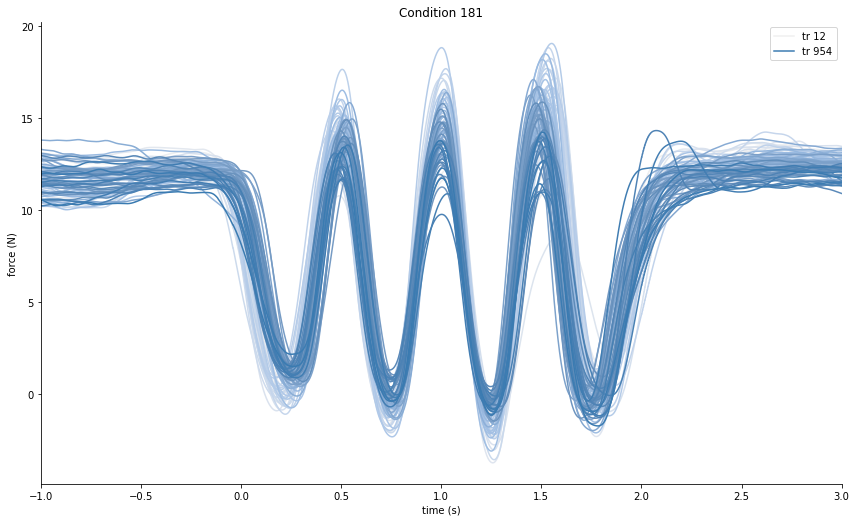

In [168]:
# plot good trial forces from 2019-12-16 for 2 Hz sinusoid with legend (only first and last trials)
# join with Condition table to plot actual condition time
# labels dict maps attributes to formatted text
dataviz.plot_table(
    pacman_behavior.Force * pacman_acquisition.Behavior.Condition
        & (pacman_acquisition.ConditionParams.Sine & {'target_frequency': 2})
        & {'session_date': '2019-12-16', 'good_trial': 1},
    'force_filt', x='condition_time', group_by=['condition_id'], stack_by=['trial'],
    axes=dict(sharey=True, show_legend=True, sparse_legend=True), 
    labels=dict(session_id=r'Session {}', condition_id=r'Condition {}', force_filt='force (N)', trial='tr {}', condition_time='time (s)')
)

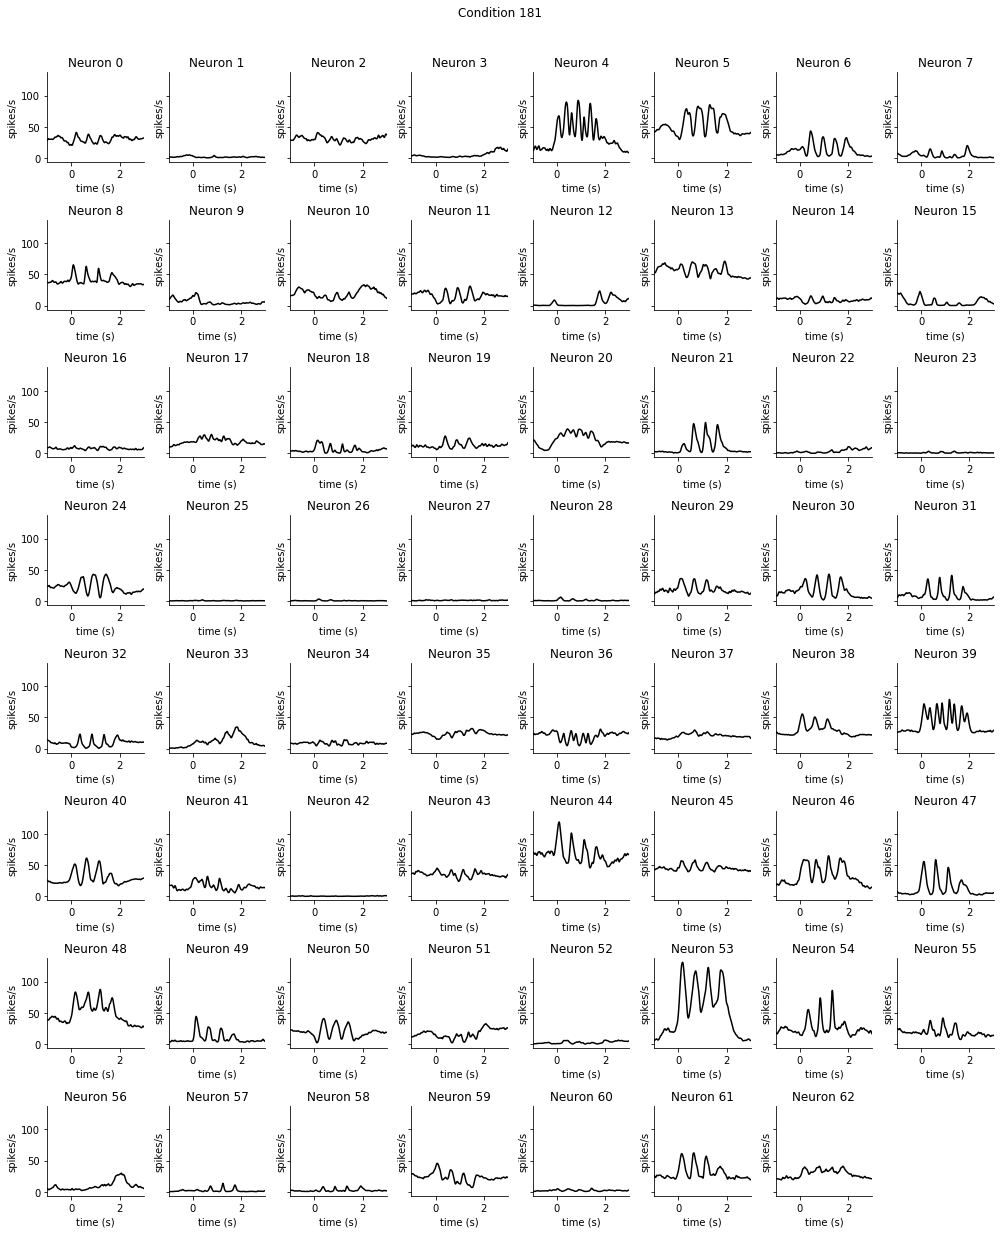

In [169]:
# plot neuron PSTHs for 2 Hz sinusoid from 2019-12-16
# set color to black for all traces
# note figures/subplots/lines autolimited; can be overriden
# plot good trial forces from 2019-12-16 for 2 Hz sinusoid with legend (only first and last trials)
# labels dict maps attributes to formatted text
dataviz.plot_table(
    pacman_brain.NeuronPsth * pacman_acquisition.Behavior.Condition
        & (pacman_acquisition.ConditionParams.Sine & {'target_frequency': 2})
        & {'session_date': '2019-12-16', 'good_trial': 1},
    'neuron_psth', x='condition_time', group_by=['neuron_id'],
    axes=dict(sharey=True), style=dict(color='k'), layout=dict(limit_subplots=None, figsize=(14,18)),
    labels=dict(session_id=r'Session {}', condition_id=r'Condition {}', neuron_psth='spikes/s', neuron_id='Neuron {}', condition_time='time (s)')
)

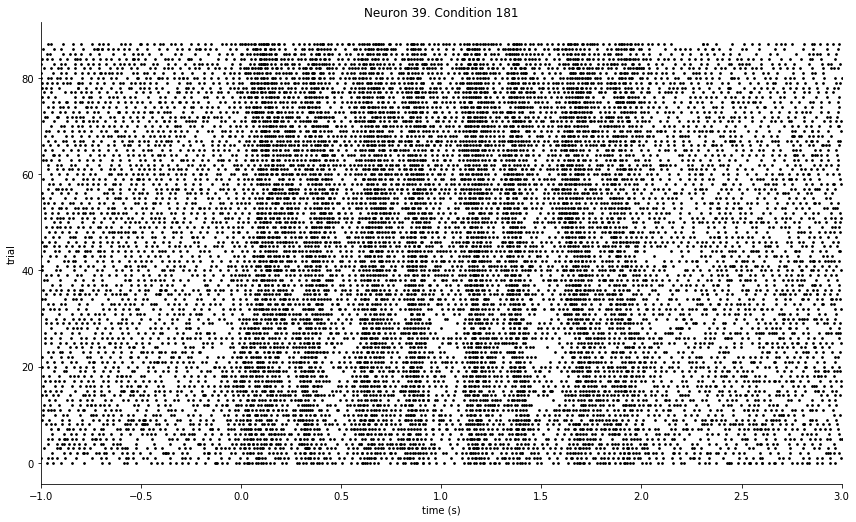

In [170]:
# plot spike raster for neuron 39 (40th neuron -- 0 indexing) from 2 Hz sinusoidal condition from 2019-12-16
dataviz.plot_table(
    pacman_brain.NeuronSpikeRaster * pacman_acquisition.Behavior.Condition
        & (pacman_acquisition.ConditionParams.Sine & {'target_frequency': 2})
        & {'session_date': '2019-12-16', 'good_trial': 1, 'neuron_id': 39},
    'neuron_spike_raster', x='condition_time', stack_by=['trial'],
    style=dict(kind='raster', color='k'),
    labels=dict(session_id=r'Session {}', condition_id=r'Condition {}', neuron_spike_raster='trial', neuron_id='Neuron {}', condition_time='time (s)')
)

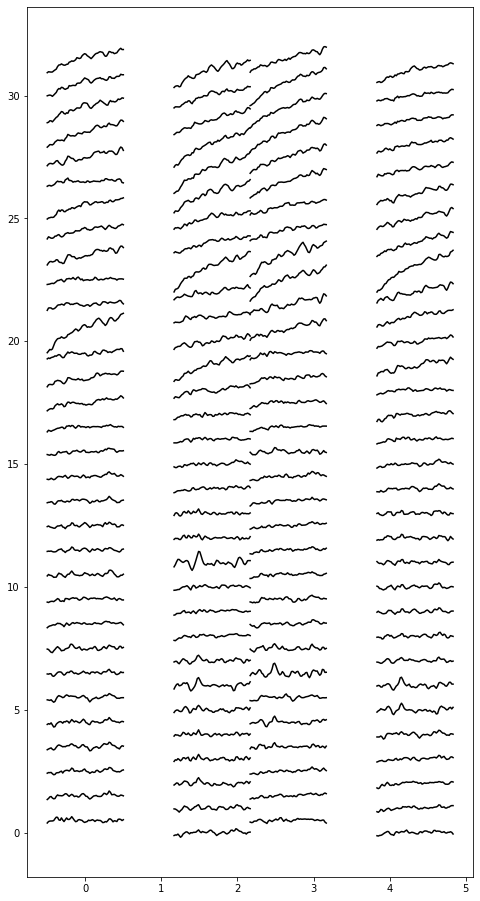

In [171]:
# plot neuron 4 from 2019-12-16 template
# seems to be a bug here...
(processing.Neuron.Template & {'session_date': '2019-12-16', 'neuron_id': 39}).plot()

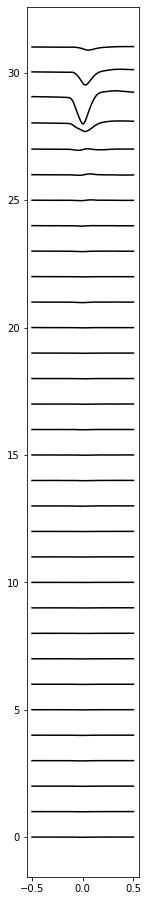

In [172]:
# try plotting a few templates from an S-Probe day
key = (acquisition.BrainChannelGroup & {'electrode_array_model': 'S-Probe'}).fetch('KEY', limit=1)[0]
(processing.Neuron.Template & key & {'neuron_id': 0}).plot()

## Various table methods

### Filtering

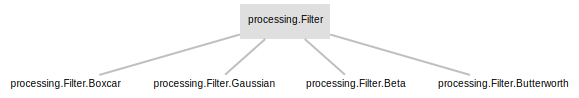

In [173]:
# each filter part table has an associated filter method
dj.ERD(processing.Filter) + 1 - dj.ERD(pacman_processing.FilterParams)

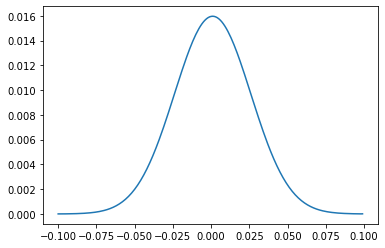

In [175]:
# plot delta function with 25 ms Gaussian
fs = 1e3
x = np.arange(-0.1, 0.1, 1/fs).round(3)
y = np.zeros(x.shape)
y[x==0] = 1
plt.figure()
plt.plot(x, (processing.Filter.Gaussian & {'sd': 25e-3, 'width': 4}).filter(y, fs));

In [ ]:
# ideal if each filter ID is unique across all part tables
# use insertpart to insert master/part entries
datajointutils.insertpart(processing.Filter, 'Gaussian', sd=10e-3)

In [176]:
processing.Filter.Gaussian()

*filter_id    sd             width    
+-----------+ +------------+ +-------+
0             0.025000000    4        
 (Total: 1)

In [ ]:
# if you don't want it
# key = (processing.Filter.Gaussian & {'sd': 10e-3}).fetch1('KEY')
# (processing.Filter & key).delete()

### File paths

In [177]:
# project full file path for behavior or ephys files
acquisition.EphysRecording & {'session_date': '2020-01-06'}

*session_date  *monkey      ephys_recordin ephys_recordin ephys_recordin
+------------+ +----------+ +------------+ +------------+ +------------+
2020-01-06     Cousteau     30000          7274.093533333 /srv/locker/ch
 (Total: 1)

In [178]:
acquisition.EphysRecording.File & {'session_date': '2020-01-06'}

*session_date  *monkey      *ephys_file_id ephys_file_pat ephys_file_nam ephys_file_ext
+------------+ +----------+ +------------+ +------------+ +------------+ +------------+
2020-01-06     Cousteau     0                             pacman-task_c_ ns6           
 (Total: 1)

In [179]:
# full file path = ephys_recording_path + ephys_file_path + ephys_file_name + '.' + ephys_file_extension
(acquisition.EphysRecording.File & {'session_date': '2020-01-06'}).proj_file_path()

*session_date  *monkey      *ephys_file_id ephys_file_pat
+------------+ +----------+ +------------+ +------------+
2020-01-06     Cousteau     0              /srv/locker/ch
 (Total: 1)

In [180]:
# same for behavior files
acquisition.BehaviorRecording.File & {'session_date': '2020-01-06'}

*session_date  *monkey      *behavior_file behavior_file_ behavior_file_ behavior_file_
+------------+ +----------+ +------------+ +------------+ +------------+ +------------+
2020-01-06     Cousteau     0                             pacman-task_c_ summary       
2020-01-06     Cousteau     1                             pacman-task_c_ data          
2020-01-06     Cousteau     2                             pacman-task_c_ params        
2020-01-06     Cousteau     3                             pacman-task_c_ data          
   ...
 (Total: 1901)

In [182]:
(acquisition.BehaviorRecording.File & {'session_date': '2020-01-06'}).proj_file_path()

*session_date  *monkey      *behavior_file behavior_file_
+------------+ +----------+ +------------+ +------------+
2020-01-06     Cousteau     0              /srv/locker/ch
2020-01-06     Cousteau     1              /srv/locker/ch
2020-01-06     Cousteau     2              /srv/locker/ch
2020-01-06     Cousteau     3              /srv/locker/ch
   ...
 (Total: 1901)

### DataJoint utilities

In [183]:
# get part tables for a given table
datajointutils.get_parts(processing.Filter)

[churchland_pipeline_python.processing.Filter.Beta,
 churchland_pipeline_python.processing.Filter.Boxcar,
 churchland_pipeline_python.processing.Filter.Butterworth,
 churchland_pipeline_python.processing.Filter.Gaussian]

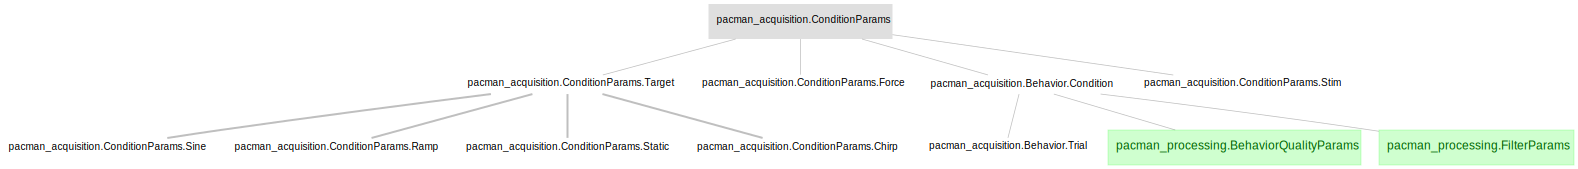

In [184]:
# note ConditionParams has several part tables and other (non-part) child tables
dj.ERD(pacman_acquisition.ConditionParams) + 2

In [185]:
# join a table with its part tables (restrict with optional key)
# with depth=1, this joins ConditionParams with the first level part tables
joined_table, part_tables = datajointutils.join_parts(pacman_acquisition.ConditionParams, {'condition_id': 0}, depth=1)

In [186]:
# the identified part tables
part_tables

[pacman_pipeline_python.pacman_acquisition.ConditionParams,
 pacman_pipeline_python.pacman_acquisition.ConditionParams.Force,
 pacman_pipeline_python.pacman_acquisition.ConditionParams.Target]

In [187]:
# the join of all the part tables
joined_table

*condition_id  *force_id    *target_id    force_max     force_offset   force_inverted target_duratio target_offset  target_pad_pre target_pad_pos
+------------+ +----------+ +-----------+ +-----------+ +------------+ +------------+ +------------+ +------------+ +------------+ +------------+
0              0            0             16            -0.1400        0              4.0000         0.0000         0.7000         0.7000        
 (Total: 1)

In [188]:
# joining all part tables up to 2 layers
joined_table, part_tables = datajointutils.join_parts(pacman_acquisition.ConditionParams, {'condition_id': 0}, depth=2)

In [189]:
part_tables

[pacman_pipeline_python.pacman_acquisition.ConditionParams,
 pacman_pipeline_python.pacman_acquisition.ConditionParams.Force,
 pacman_pipeline_python.pacman_acquisition.ConditionParams.Target,
 pacman_pipeline_python.pacman_acquisition.ConditionParams.Ramp]

In [190]:
joined_table

*condition_id  *force_id    *target_id    force_max     force_offset   force_inverted target_duratio target_offset  target_pad_pre target_pad_pos target_amplitu
+------------+ +----------+ +-----------+ +-----------+ +------------+ +------------+ +------------+ +------------+ +------------+ +------------+ +------------+
0              0            0             16            -0.1400        0              4.0000         0.0000         0.7000         0.7000         1.0000        
 (Total: 1)

In [191]:
# querying a table with exact attribute/key values
equipment.ElectrodeArray & {'electrode_array_model': 'Neuropixels', 'electrode_array_model_version': 'nhp demo', 'electrode_array_id': 0}

*electrode_arr *electrode_arr *electrode_arr electrode_arra
+------------+ +------------+ +------------+ +------------+
Neuropixels    nhp demo       0                            
 (Total: 1)

In [192]:
# a quicker alternative (matches the primary keys to the ordered tuple of attribute values)
query, key = datajointutils.match_fuzzy_key(equipment.ElectrodeArray, ('Neuropixels', 'nhp demo', 0))

In [193]:
query

*electrode_arr *electrode_arr *electrode_arr electrode_arra
+------------+ +------------+ +------------+ +------------+
Neuropixels    nhp demo       0                            
 (Total: 1)

In [194]:
key

{'electrode_array_model': 'Neuropixels',
 'electrode_array_model_version': 'nhp demo',
 'electrode_array_id': 0}

In [195]:
# works with fewer attributes (but not guaranteed to return a length-1 query)
query, key = datajointutils.match_fuzzy_key(equipment.ElectrodeArray, 'Neuropixels')

In [196]:
query

*electrode_arr *electrode_arr *electrode_arr electrode_arra
+------------+ +------------+ +------------+ +------------+
Neuropixels    nhp demo       0                            
 (Total: 1)

In [197]:
key

{'electrode_array_model': 'Neuropixels',
 'electrode_array_model_version': 'nhp demo',
 'electrode_array_id': 0}